In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
* mengumpulkan seluruh data yang dibutuhkan
* menilai kualitas dari data yang telah dikumpulkan
* membersihkan data tersebut sehingga siap untuk dianalisis

In [91]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv')
order_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv')
product_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv')
sales_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv')

In [92]:
customer_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [93]:
order_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [94]:
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [95]:
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


# assesing data


## customer_df

In [96]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [97]:
customer_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [98]:
print('jumlah duplikasi: ', customer_df.duplicated().sum())

jumlah duplikasi:  6


In [99]:
customer_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


## data order_df 

In [100]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [101]:
print('jumlah duplikat: ', order_df.duplicated().sum())

jumlah duplikat:  0


In [102]:
order_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


## product_df

In [103]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [104]:
product_df.isna().sum()

product_id      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

In [105]:
print('jumlah duplicat: ', product_df.duplicated().sum())

jumlah duplicat:  6


In [106]:
product_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


## sales_df

In [107]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [108]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [109]:
print('jumlah duplicated: ', sales_df.duplicated().sum())

jumlah duplicated:  0


In [110]:
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


# cleaning data

## customer_df 
* duplicate data
* missing value
* innaccurate value

In [111]:
customer_df.drop_duplicates(inplace=True)

In [112]:
customer_df.duplicated().sum()

0

In [113]:
customer_df[customer_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [114]:
customer_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [115]:
customer_df.fillna(value='Prefer not to say', inplace=True)

In [116]:
customer_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [117]:
customer_df[(customer_df.age == customer_df.age.max())]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [118]:
customer_df.age.replace({700:70}, inplace=True)

In [119]:
customer_df[(customer_df.age == customer_df.age.max())]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [120]:
customer_df.age.replace({500:50}, inplace=True)

In [121]:
customer_df[(customer_df.age == customer_df.age.max())]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [122]:
customer_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


## order_df 
* tipe data

In [123]:
tipe_data = ['order_date', 'delivery_date']

for colum in tipe_data:
  order_df[colum] = pd.to_datetime(order_df[colum])

## product_df
* duplicated

In [124]:
product_df[product_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [125]:
product_df.drop_duplicates(inplace=True)

In [126]:
product_df.duplicated().sum()

0

## data sales_df
* missing value pada total_price

In [127]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [128]:
sales_df['total_price'] = sales_df.price_per_unit * sales_df.quantity

In [129]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [130]:
customer_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


# Explorasi Data Analisis

# Permasalahan
* bagaimana performa penjualan perusahaan dalam beberapa bulan terakhir?
* Produk apa yang paling banyak dan paling sedikit terjual?
* bagaimna demografi pelanggan yang kita miliki?
* kapan terakhir pelanggan melakukan transaksi?
* seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
* berapa banyak uang yang dihabiskan pelanggan dalam bebrapa bulan terakhir?

In [131]:
customer_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


dari data diatas dapat disimpulkan bahwa kita memiliki customer sebanyak 1001 orang dengan kisaran umur dari 20 sampai 80 dengan rata-rata 49.87

* demografi pelanggan berdasarkan jenis kelamin

In [132]:
customer_df.groupby(by='gender').agg({
    'customer_id' : 'nunique',
    'age':['max','min','mean','std']
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

data diatas mengelompokan umur berdasarkan jenis kelamin (gender). data diatas di dominasikan oleh gender 'Prefer not to say' dan umur yang berkisaran antara 20 sampai 80

* demografi berdasarkan city dan negara

In [133]:
customer_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [134]:
customer_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

persebaran pelanggan cukup merata di setiap bagian kota dan negara. pelanggan kita paling banyak berada di kota east aidan,east sophia, new ava dengan jumlah masing" 3 pelanggan. selain itu pelanggan kita paling banyak di negara bagian south australia

# mencari selihih pengiriman dan pemesanan order_df
* delivery_date
* order_date

In [135]:
delivery_time = order_df['delivery_date'] - order_df['order_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df['delivery_time'] = round(delivery_time/86400) # convert ke hari

In [136]:
order_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [137]:
order_df.describe(include='all')

<ipython-input-137-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')
<ipython-input-137-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


dari hasil diatas diketahui bahwa rata-rata waktu pengiriman sebesar 14hari dengan nilai maksimal 27 hari dan nilai minimum sebesar sehari

# eksplorasi data order_df dan customer_df
* mengidentifikasi pelanggan yang belum pernah melakukan transaksi

In [138]:
order_df_customer_id = order_df.customer_id
customer_df['status'] = customer_df['customer_id'].apply(lambda x: 'Active' if x in order_df_customer_id else 'Non Active')
customer_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
37,38,fulan 38,Male,34,2958 Dooley Station StSuite 879,1920,Lake Lilly,Australian Capital Territory,Australia,Active
548,548,fulan 548,Prefer not to say,57,163 Sophia RunApt. 833,7432,West Elliestad,Northern Territory,Australia,Active
867,863,fulan 863,Prefer not to say,64,89 Daniel MeadowApt. 144,2721,Charliborough,Australian Capital Territory,Australia,Active
809,806,fulan 806,Male,79,865 Ivy TrailSuite 324,1265,New Joshuaview,Tasmania,Australia,Active
304,305,fulan 305,Prefer not to say,25,0052 Benjamin MewsApt. 635,7024,Lake Aidan,Australian Capital Territory,Australia,Active


In [139]:
customer_df.groupby('status')['customer_id'].count()

status
Active        1000
Non Active       1
Name: customer_id, dtype: int64

dari data di atas hanya terdapat 1 pelanggan yang tidak aktif atau tidak melakukan transaksi sama sekali

# melakukan penggabungan 2 data
* diharapkan mendapatkan informasi lebih banyak

In [140]:
orders_customer_df = pd.merge(
    left = order_df,
    right = customer_df,
    how='left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

orders_customer_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


* jumlah order berdasarkan kota

In [141]:
orders_customer_df.groupby(by='city').order_id.nunique().sort_values(ascending=False)

city
Jordanside    6
New Ava       6
Lake Rose     5
O'keefeton    5
East Max      5
             ..
Noahmouth     1
Graceville    1
New Sophie    1
New Sienna    1
Zacville      1
Name: order_id, Length: 605, dtype: int64

berdasarkan hasil diatas diketahui bahwa kota jordanside dan new ava merupakan kota yang memiliki jumlah orderan terbanyak

In [142]:
orders_customer_df.groupby(by='state').order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

berdasarkan hasil diatas negara bagian south australia memiliki jumlah orderan terbanyak

In [143]:
orders_customer_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

dari hasil diatas gender 'prefer not to say' melakukan orderan paling banyak

In [144]:
orders_customer_df['age_group'] = orders_customer_df.age.apply(lambda x: 'Youth' if x <= 24 else ('Senior' if x > 64 else 'Adults'))
orders_customer_df.groupby(by='age_group').order_id.nunique().sort_values(ascending=False)

age_group
Adults    681
Senior    226
Youth      93
Name: order_id, dtype: int64

# eksplorasi data product_df dan sales_df

In [145]:
product_df.describe(include='all')

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [146]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


berdasarkan hasil diatas dilihat bahwa barang yang terjual dengan harga minimum 90 ribu dan maximum 119 ribu. dapat dilihat juga setiap transaksi pelanggan paling banyak membeli 3 buah item dalam satu jenis produk dengan total harga sebesat 357 rupiah

* mengecek harga termahal dan terendah

In [147]:
product_df.sort_values(by='price', ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


* product berdasarkan type produk

In [148]:
product_df.groupby(by='product_type').agg({
    'product_id':'nunique',
    'quantity':'sum',
    'price':['min','max']
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

* product berdasarkan nama produk

In [149]:
product_df.groupby(by='product_name').agg({
    'product_id':'nunique',
    'quantity':'sum',
    'price':['min', 'max']
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

## Product terlaris

In [150]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [151]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [152]:
sales_product_df.groupby(by='product_type').agg({
    'sales_id':'nunique',
    'quantity_x':'sum',
    'total_price':'sum'
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


dari data diatas product 'Trousers' merupakan produk terlaris, sementara 'jacket' merupakan product dengan revenue terbesar

In [153]:
sales_product_df.groupby(by='product_name').agg({
    'sales_id':'nunique',
    'quantity_x':'sum',
    'total_price':'sum'
}).sort_values(by='total_price', ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


dari data diatas diketahui bahwa denim adalah product paling laris dan paling banyak menyumbang revenue

In [154]:
all_df = pd.merge(
    left=orders_customer_df,
    right=sales_product_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [155]:
# refrensi pembelian berdasarkan state pelangan dan tipe produk
all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x':'sum',
    'total_price':'sum'
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket             406.0      43204.0
                             Shirt              396.0      40448.0
                             Trousers           454.0      46790.0
New South Wales              Jacket             451.0      47998.0
                             Shirt              431.0      43980.0
                             Trousers           392.0      39766.0
Northern Territory           Jacket             365.0      38991.0
                             Shirt              336.0      33865.0
                             Trousers           384.0      38998.0
Queensland                   Jacket             499.0      53511.0
                             Shirt              417.0      42506.0
                             Trousers           453.0      46045.0
South Australia              Jacket             461.0      49090.0
                             Shirt              509.0      52685.0
                             Trousers           455.0      46041.0
Tasmania                     Jacket             412.0      44370.0
                             Shirt              387.0      39668.0
                             Trousers           379.0      38057.0
Victoria                     Jacket             359.0      38203.0
                             Shirt              390.0      40206.0
                             Trousers           414.0      41948.0
Western Australia            Jacket             390.0      41659.0
                             Shirt              393.0      40242.0
                             Trousers           429.0      43529.0

data diatas memberikan gambaran tiap tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya.

In [156]:
# selera tipe produk pelanggan berdasarkan gender dan kelomopk usia
all_df.groupby(by=['gender','product_type']).agg({
    'quantity_x':'sum',
    'total_price':'sum'
})


quantity_x  total_price
gender            product_type                         
Female            Jacket             481.0      50963.0
                  Shirt              445.0      45146.0
                  Trousers           481.0      49295.0
Male              Jacket             480.0      50978.0
                  Shirt              410.0      41939.0
                  Trousers           453.0      46071.0
Prefer not to say Jacket            2382.0     255085.0
                  Shirt             2404.0     246515.0
                  Trousers          2426.0     245808.0

In [157]:
all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x':'sum',
    'total_price':'sum'
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket            2292.0     245055.0
          Shirt             2225.0     227781.0
          Trousers          2272.0     231271.0
Senior    Jacket             777.0      82959.0
          Shirt              733.0      74977.0
          Trousers           766.0      77471.0
Youth     Jacket             274.0      29012.0
          Shirt              301.0      30842.0
          Trousers           322.0      32432.0

# Visualisasi

In [158]:
monthly_order_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id':'nunique',
    'total_price':'sum'
})

monthly_order_df.index = monthly_order_df.index.strftime('%Y-%m')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    'order_id':'order_count',
    'total_price':'revenue'
}, inplace=True)


monthly_order_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333.0
1,2021-02,94,95080.0
2,2021-03,118,131364.0
3,2021-04,101,97530.0
4,2021-05,84,85597.0


In [159]:
monthly_order_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id':'nunique',
    'total_price':'sum'
})

monthly_order_df.index = monthly_order_df.index.strftime('%B') # conversi ke satuan bulan
monthly_order_df = monthly_order_df.reset_index()

monthly_order_df.rename(columns={
    'order_id':'order_count',
    'total_price':'revenue'
}, inplace=True)

monthly_order_df.head()

,order_date,order_count,revenue
0,January,109,119333.0
1,February,94,95080.0
2,March,118,131364.0
3,April,101,97530.0
4,May,84,85597.0


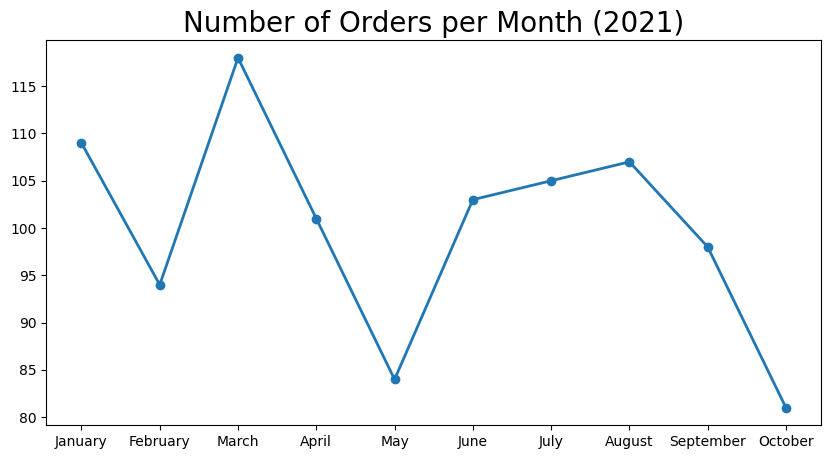

In [160]:
plt.figure(figsize=(10,5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['order_count'], marker='o', linewidth=2)
plt.title('Number of Orders per Month (2021)', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

kenaikan berapa pada bulan march dan penurunan terjadi pada bulan february, april, may, october

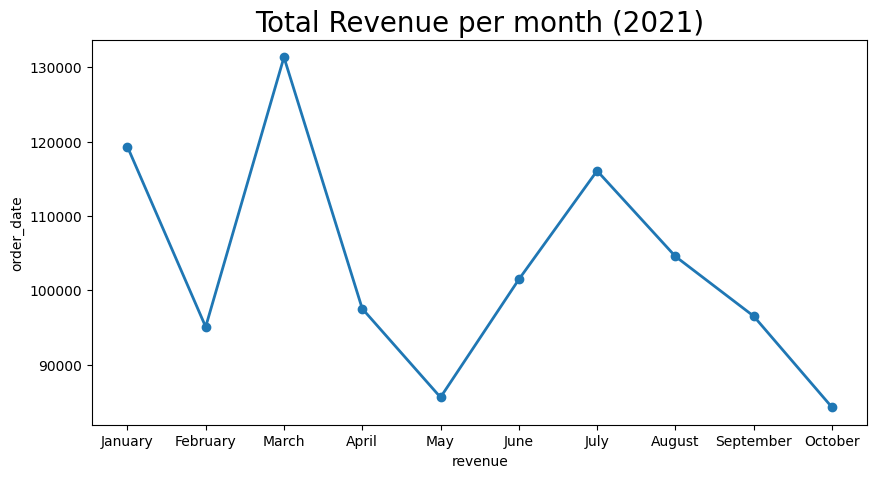

In [161]:
# pengecekan revenue
plt.figure(figsize=(10,5))
plt.plot(
      monthly_order_df['order_date'],
      monthly_order_df['revenue'],
      marker='o',
      linewidth=2,
)
plt.title('Total Revenue per month (2021)', loc='center', fontsize=20)
plt.xlabel('revenue')
plt.ylabel('order_date')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

penurunan yang siknifikan terjadi di bulan february, april, may, october berdampak terhadap penurunan pada revenue perusahaan.

hal ini bisa terjadi karena beberapa faktor antara lain, kompetittor, campaign, dll

In [162]:
# produk yang paling banyak dan paling sedikit
sum_order_items_df = all_df.groupby('product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head()

,product_name,quantity_x
0,Denim,527.0
1,Joggers,334.0
2,Pleated,308.0
3,Casual Slim Fit,306.0
4,Shearling,302.0


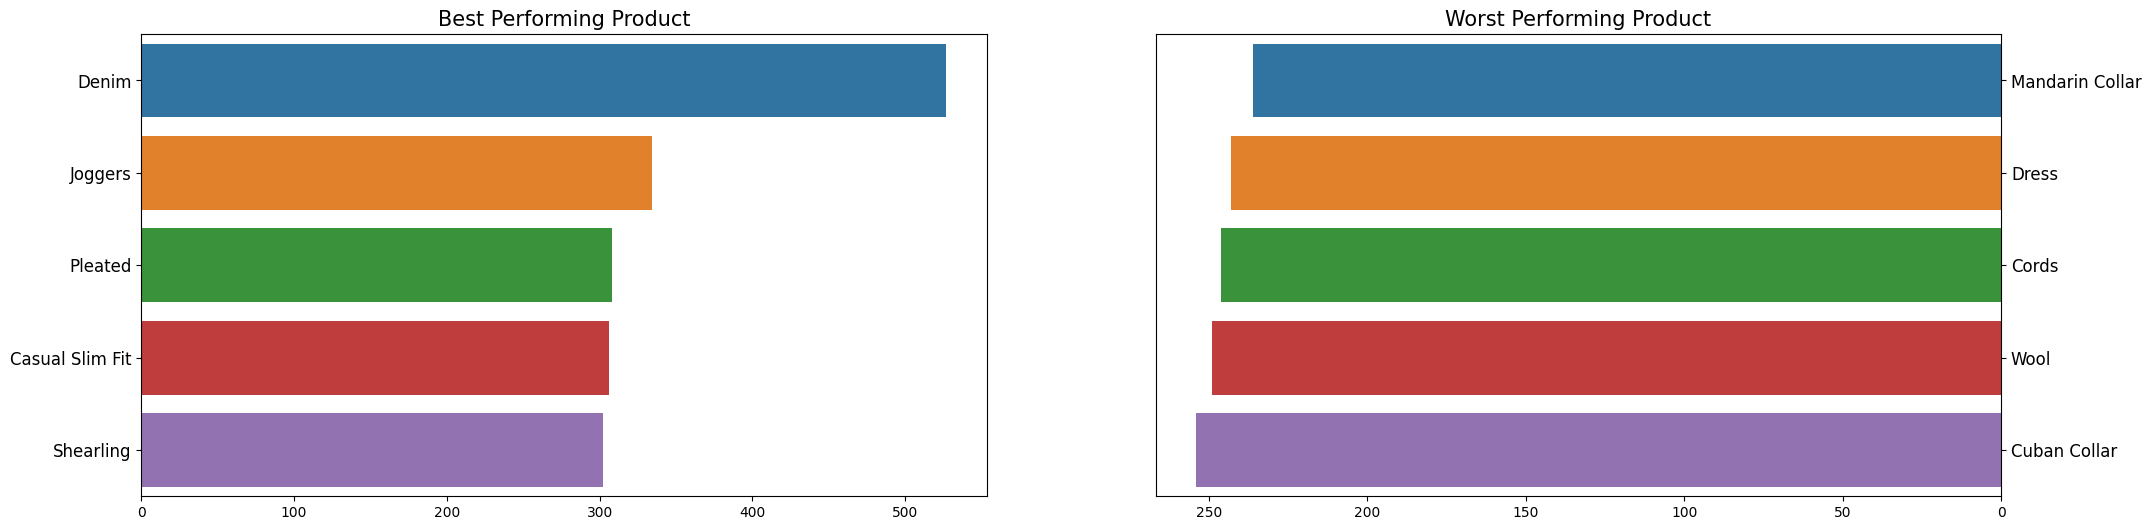

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.head(5), ax=ax[0])
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.sort_values(by='quantity_x',ascending=True).head(5), ax=ax[1])
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)

grafik sebelah kiri adalah grafik penjualan dari yang terbesar pembeliannya, sementara yang sebelah kanan adalah kebalikannya

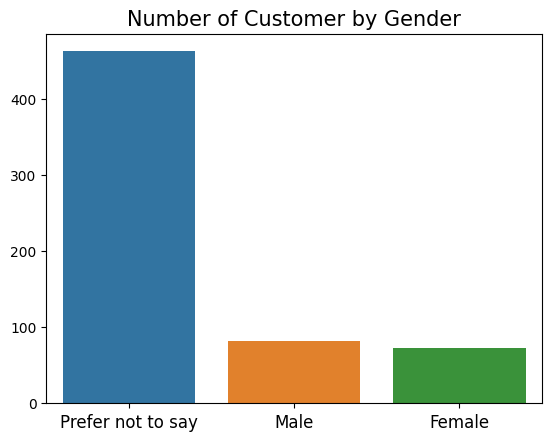

In [164]:
# Demografi by gender
bygender = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender.rename(columns={
    'customer_id':'customer_count'
}, inplace=True)

sns.barplot(x='gender', y='customer_count', data=bygender.sort_values(by='gender', ascending=False))
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Customer by Gender', loc='center', fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.show()

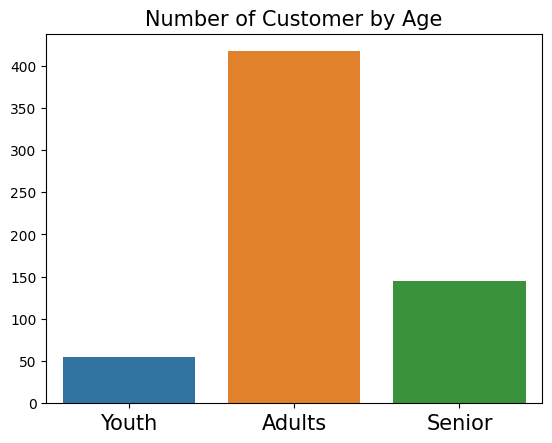

In [165]:
# Demografi by age
byage = all_df.groupby(by='age_group').customer_id.nunique().reset_index()
byage.rename(columns={
    'customer_id':'customer_count'
}, inplace=True)
byage['age_group'] = pd.Categorical(byage['age_group'], ["Youth", "Adults", "Senior"])
byage.value_counts()

sns.barplot(
    x='age_group',
    y='customer_count',
    data=byage.sort_values(by='customer_count', ascending=False)
)
plt.title('Number of Customer by Age', loc='center', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=15)
plt.show()

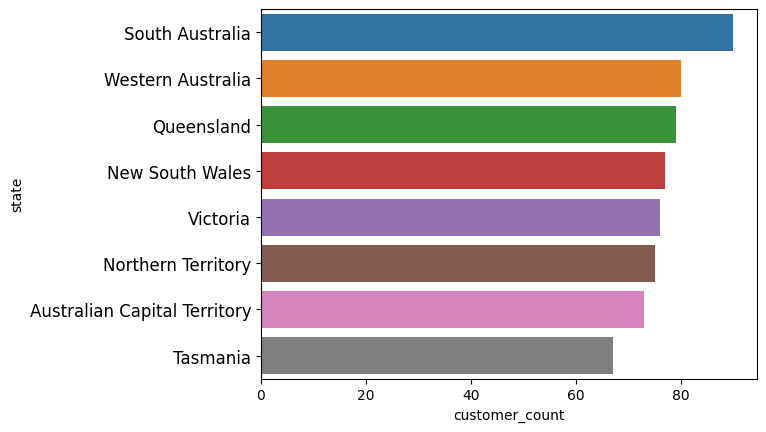

In [166]:
# demografi by states
bystate = all_df.groupby(by='state').customer_id.nunique().reset_index()
bystate.rename(columns={
    'customer_id':'customer_count'
}, inplace=True)
bystate
sns.barplot(
    x='customer_count',
    y='state',
    data=bystate.sort_values(by='customer_count', ascending=False),
    orient='h'
    )
plt.tick_params(axis='y', labelsize=12)
plt.show()

# RFM analysis

pengelompokan berdasarkan tiga parameter:
* recency
* frequency
* monetary

In [167]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_date':'max', # tanggal maximal order
    'order_id':'nunique', # total pelanggan
    'total_price':'sum' # menghitung jumlah revenue yang dihasilkan
})
rfm_df

,customer_id,order_date,order_id,total_price
0,1,2021-04-04,3,1641.0
1,7,2021-05-21,1,1017.0
2,10,2021-03-09,1,270.0
3,11,2021-05-28,1,382.0
4,12,2021-06-19,1,1551.0
...,...,...,...,...
612,994,2021-01-12,1,1716.0
613,995,2021-08-02,1,2140.0
614,996,2021-09-03,2,3045.0
615,998,2021-07-19,4,4415.0


In [168]:
rfm_df.columns = ['customer_id', 'max_order_timestamp','frequency','monetary']
rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641.0
1,7,2021-05-21,1,1017.0
2,10,2021-03-09,1,270.0
3,11,2021-05-28,1,382.0
4,12,2021-06-19,1,1551.0
...,...,...,...,...
612,994,2021-01-12,1,1716.0
613,995,2021-08-02,1,2140.0
614,996,2021-09-03,2,3045.0
615,998,2021-07-19,4,4415.0


In [169]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

In [172]:
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

In [173]:
rfm_df

,customer_id,frequency,monetary,recency
0,1,3,1641.0,203
1,7,1,1017.0,156
2,10,1,270.0,229
3,11,1,382.0,149
4,12,1,1551.0,127
...,...,...,...,...
612,994,1,1716.0,285
613,995,1,2140.0,83
614,996,2,3045.0,51
615,998,4,4415.0,97


mengidentifikasi best customer berdasarkan parameter frequency, monetary, recancy

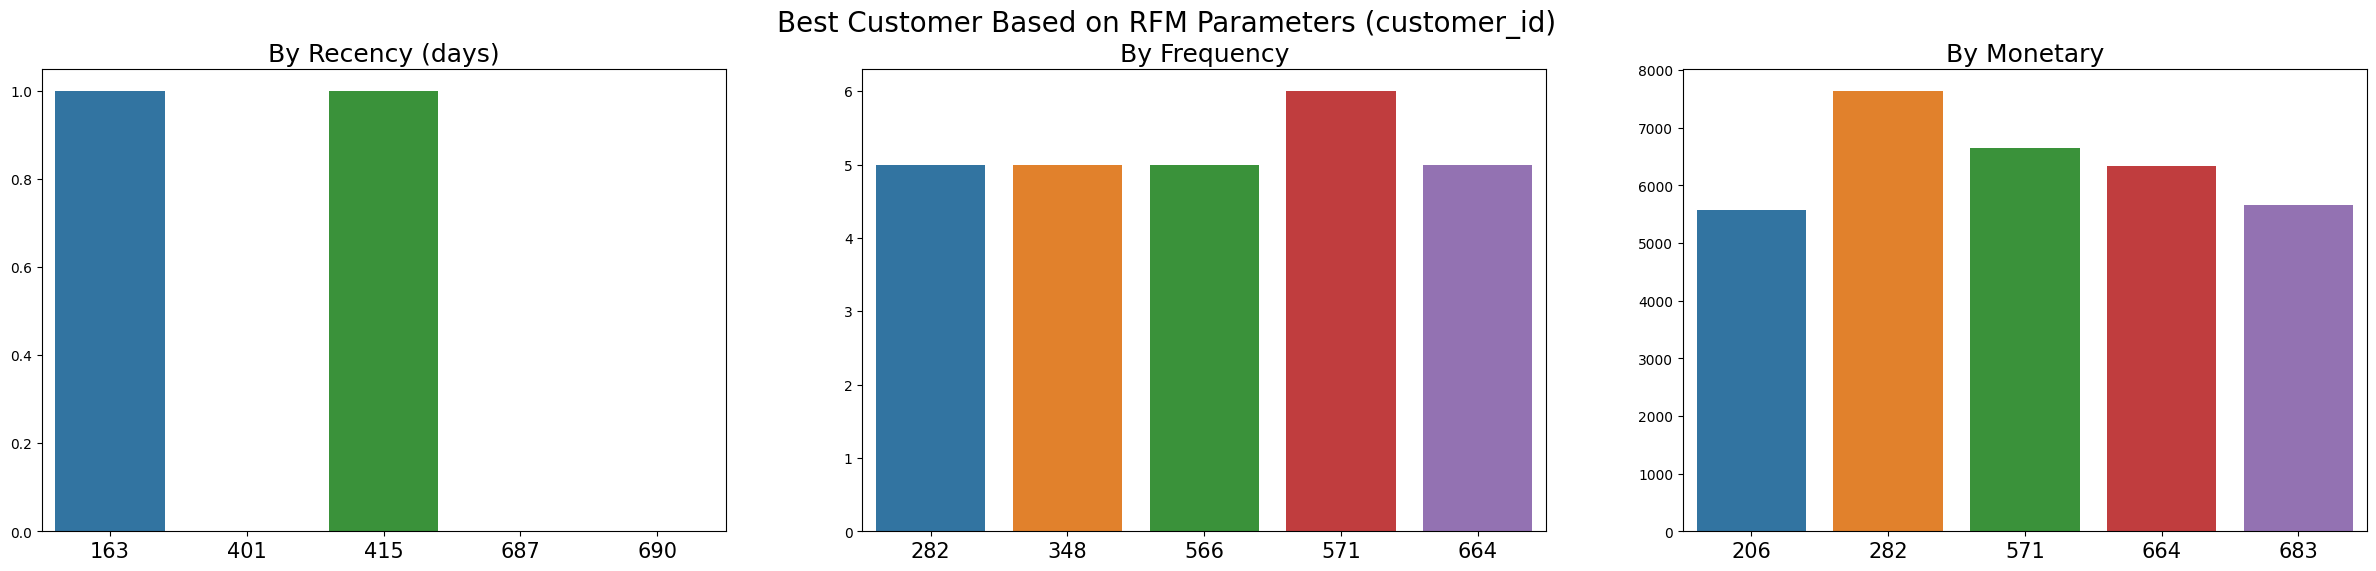

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(x='customer_id', y='recency', data=rfm_df.sort_values(by='recency', ascending=True).head(), ax=ax[0])
ax[0].set_title('By Recency (days)',loc='center', fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(), ax=ax[1])
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y='monetary', x='customer_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(), ax=ax[2])
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle('Best Customer Based on RFM Parameters (customer_id)', fontsize=20)
plt.show()

kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut